# Twitter News Organization Sentiment Analysis

# Summary of Findings

## Polarization
- Based on the range of sentiment values taken from 11/20/17 and 12/2/17, the tweets from New York Times and BBC News are generally the most neutral (sentiment-free) tweets. 
- Fox News and CNN produce the highest and lowest (most sentimentally polarized) tweets. 

## Average Sentiment Score
##### As of 11/20/2017 at 12pm:
- CNN shows the most negatively polarized tweets, on average. 
- Fox News shows the most positively polarized tweets. (Reading through the most positively-scoring tweets shows they were actually retweets of positive Trump tweets!)

##### As of 12/2/2017 at 2:50pm:
- CBS shows the most negatively polarized tweets, on average. 
- New York Times shows the most positively polarized tweets.

In [5]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("seaborn")
import json
import tweepy
import time
from datetime import datetime

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)


#### Set up Twitter API and Sentiment Analyzer

In [6]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Set up Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

## Build sentiment analysis
#### Loop through last 100 tweets from 5 popular news organizations, and store sentiment analysis datasets for visualization

In [7]:
# Store current time in variable
now = datetime.now()

# Target Accounts
news_accounts = ["@CBSNews", "@FoxNews", "@CNN", "@BBCNews", "@NYTimes"]

# Arrays to hold master dataframe and mean aggregates
news_tweet_sentiments = []
news_sentiment_means = []

# Loop through each news organization
for account in news_accounts:
    # Initialize each organization's mean sentiment list
    org_compound_list = []
    org_positive_list = []
    org_negative_list = []
    org_neutral_list = []
    
    # Counter
    counter = 1
    
    # Get all tweets from organization's home feed
    public_tweets = api.user_timeline(account, count=100)

    # Loop through all tweets 
    for tweet in public_tweets:
        tweet_text = tweet["text"]
        # Date format in JSON is: "Fri Feb 09 00:35:02 +0000 2007"
        tweet_date = datetime.strptime(tweet["created_at"], '%a %b %d %X %z %Y')

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet_text)
        cmp = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

        # Add sentiment values for each tweet into list of dictionaries for dataframe (of all tweets by news organization)
        news_tweet_sentiments.append({"User": account,
                                   "Date": tweet_date, 
                                   "Compound": cmp,
                                   "Positive": pos,
                                   "Negative": neg,
                                   "Neutral": neu,
                                   "Tweet Text": tweet_text,
                                   "Tweets Ago": tweets_ago})

        # Append values into arrays for the means (2nd chart)
        org_compound_list.append(cmp)
        org_positive_list.append(pos)
        org_negative_list.append(neg)
        org_neutral_list.append(neu)
        
        # Add to counter 
        counter = counter + 1
    
    # Store the mean sentiment values into separate array
    sentiment_mean = {"User": account,
                     "Compound": np.mean(org_compound_list),
                     "Positive": np.mean(org_positive_list),
                     "Neutral": np.mean(org_neutral_list),
                     "Negative": np.mean(org_negative_list),
                     "Tweet Count": len(org_compound_list)}

    news_sentiment_means.append(sentiment_mean)

#### Output dataframe for verification

In [10]:
# Convert master sentiments dataset into DataFrame
df_sentiments = pd.DataFrame(news_tweet_sentiments)

# Open and write to output file
csv_file = f"TwitterNewsSentimentAnalysis_{now.strftime('%m-%d-%Y %H%M')}.csv"
df_sentiments.to_csv(csv_file, index=False)

# Output top rows of dataframe
df_sentiments.head(50)

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.4939,2017-12-02 20:35:01+00:00,0.000,0.862,0.138,A British police officer has been praised for ...,1,@CBSNews
1,0.0000,2017-12-02 20:15:01+00:00,0.000,1.000,0.000,More than 200 pounds of unclaimed contraband b...,2,@CBSNews
2,0.0000,2017-12-02 19:55:01+00:00,0.000,1.000,0.000,The White House is finalizing plans for Presid...,3,@CBSNews
3,0.0000,2017-12-02 19:35:01+00:00,0.000,1.000,0.000,"For more than 20 years, the band Spoon has bee...",4,@CBSNews
4,0.2023,2017-12-02 18:55:02+00:00,0.092,0.777,0.131,An FBI agent suspected of sending anti-Trump t...,5,@CBSNews
5,0.5719,2017-12-02 18:35:00+00:00,0.000,0.802,0.198,"Andy Weir, the author of ""The Martian,"" is hap...",6,@CBSNews
6,-0.7351,2017-12-02 18:15:01+00:00,0.246,0.754,0.000,President Trump says he fired Michael Flynn be...,7,@CBSNews
7,0.1779,2017-12-02 17:55:01+00:00,0.091,0.788,0.120,Missing Florida teenager who police said was w...,8,@CBSNews
8,0.0000,2017-12-02 17:35:01+00:00,0.000,1.000,0.000,Tax reform bill: What's in the final version p...,9,@CBSNews
9,-0.6124,2017-12-02 17:19:32+00:00,0.192,0.808,0.000,NEW: President Trump speaks out on Michael Fly...,10,@CBSNews


#### Break up into datasets for each organization

In [11]:
# Define organization-specific datasets
df_cnn = df_sentiments[df_sentiments["User"] == "@CNN"]
df_bbc = df_sentiments[df_sentiments["User"] == "@BBCNews"]
df_fox = df_sentiments[df_sentiments["User"] == "@FoxNews"]
df_nyt = df_sentiments[df_sentiments["User"] == "@NYTimes"]
df_cbs = df_sentiments[df_sentiments["User"] == "@CBSNews"]
df_nyt.head(10)

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
400,0.6072,2017-12-02 20:41:04+00:00,0.000,0.820,0.180,The first test of Prince Harry and Meghan Mark...,1,@NYTimes
401,-0.6808,2017-12-02 20:26:05+00:00,0.248,0.752,0.000,"A memo. An executive visit to ""NBC Nightly New...",2,@NYTimes
402,0.4215,2017-12-02 20:11:04+00:00,0.000,0.865,0.135,The Republican tax plan could mean leaving gov...,3,@NYTimes
403,-0.3818,2017-12-02 19:56:02+00:00,0.140,0.860,0.000,“Everybody’s bawling.” A girls basketball team...,4,@NYTimes
404,-0.7351,2017-12-02 19:41:03+00:00,0.267,0.733,0.000,President Trump tweeted that he fired Michael ...,5,@NYTimes
405,-0.3182,2017-12-02 19:31:02+00:00,0.162,0.687,0.151,RT @nytvideo: Is it ever O.K. to joke about ra...,6,@NYTimes
406,0.6908,2017-12-02 19:21:03+00:00,0.095,0.563,0.342,Like other Washington traditions that Trump ha...,7,@NYTimes
407,0.0000,2017-12-02 19:06:06+00:00,0.000,1.000,0.000,See how your senator voted on the GOP tax bill...,8,@NYTimes
408,0.4019,2017-12-02 18:56:04+00:00,0.000,0.886,0.114,RT @nytmike: A rare public statement on the re...,9,@NYTimes
409,0.0000,2017-12-02 18:46:02+00:00,0.000,1.000,0.000,Opinion: Who might now be swept up in the inve...,10,@NYTimes


## Show scatter plots
#### Visualization of all 5 news organizations' last 100 tweet sentiment values

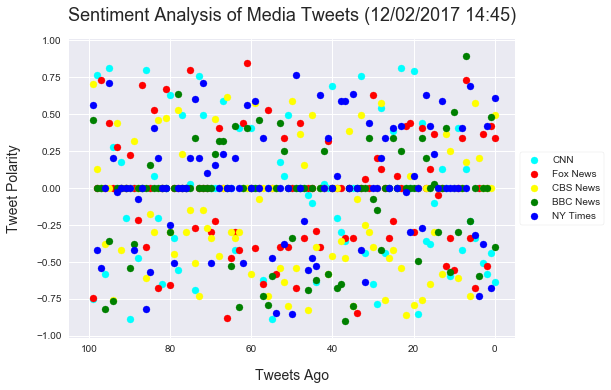

In [12]:
# Initialize label variables for each news org
lbl_cnn = "CNN"
lbl_fox = "Fox News"
lbl_cbs = "CBS News"
lbl_bbc = "BBC News"
lbl_nyt = "NY Times"

# Colors
color_cnn = "cyan"
color_fox = "red"
color_bbc = "green"
color_cbs = "yellow"
color_nyt = "blue"

# ***** SET AXIS TICKS, LABELS, LIMITS, AND TITLE ******
fig, ax = plt.subplots()
ax.set_xlim(105, -5)
ax.set_xlabel("Tweets Ago", fontsize=14)
ax.set_ylabel("Tweet Polarity", fontsize=14)   
ax.set_title(f"Sentiment Analysis of Media Tweets ({now.strftime('%m/%d/%Y %H:%M')})", fontsize=18)
ax.set_xmargin = 20

# ********* SCATTER PLOTTING ************
xaxis = np.arange(100)
handle_cnn = ax.scatter(xaxis, df_cnn["Compound"], facecolors=color_cnn, marker="o", label=lbl_cnn)
handle_fox = ax.scatter(xaxis, df_fox["Compound"], facecolors=color_fox, marker="o", label=lbl_fox)
handle_cbs = ax.scatter(xaxis, df_cbs["Compound"], facecolors=color_cbs, marker="o", label=lbl_cbs)
handle_bbc = ax.scatter(xaxis, df_bbc["Compound"], facecolors=color_bbc, marker="o", label=lbl_bbc)
handle_nyt = ax.scatter(xaxis, df_nyt["Compound"], facecolors=color_nyt, marker="o", label=lbl_nyt)
                     
# Add some padding below and to left of the ticks in the axes
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.title.set_position([.5, 1.04])

# Define scatter plot legend
ax.legend(handles=[handle_cnn, handle_fox, handle_cbs, handle_bbc, handle_nyt], frameon=True, facecolor="white", loc='center left', bbox_to_anchor=(1, 0.5))

# Output the scatter plot to file
plt.savefig(f"TwitterNewsSentimentAnalysis_Scatter_{now.strftime('%m-%d-%Y %H%M')}.png")

# Show scatter plot
plt.show()

## Visualize sentiment aggregate analysis
#### Output mean compound sentiment analysis as bar charts, for last 100 tweets of each organization

In [13]:
# Convert sentiment means dataset into DataFrame
df_sentiment_means = pd.DataFrame(news_sentiment_means)
df_sentiment_means.head(10)

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,-0.134778,0.11628,0.82864,0.05508,100,@CBSNews
1,-0.024321,0.07292,0.86545,0.06161,100,@FoxNews
2,-0.041689,0.08092,0.85242,0.06664,100,@CNN
3,-0.069784,0.08863,0.86426,0.04710,100,@BBCNews
4,0.026535,0.06661,0.86270,0.07069,100,@NYTimes


In [14]:
# Create series holding our aggregate dataset
sentiment_mean = pd.Series([df_sentiment_means.at[2, "Compound"], 
                            df_sentiment_means.at[1, "Compound"],
                            df_sentiment_means.at[0, "Compound"],
                            df_sentiment_means.at[3, "Compound"],
                            df_sentiment_means.at[4, "Compound"]
                           ],
                           [lbl_cnn, lbl_fox, lbl_cbs, lbl_bbc, lbl_nyt]
                          )

sentiment_mean

CNN        -0.041689
Fox News   -0.024321
CBS News   -0.134778
BBC News   -0.069784
NY Times    0.026535
dtype: float64

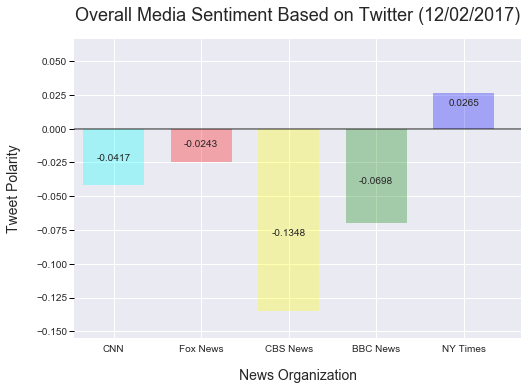

In [15]:
# Define our Bar chart 
x_axis = np.arange(0, 5, 1)
barwidth = 0.7       # the width of the bars

# Create our axis variable
fig, ax = plt.subplots()

# Define bars
colors = [color_cnn, color_fox, color_cbs, color_bbc, color_nyt]
rects = ax.bar(x_axis, sentiment_mean, color=colors, alpha=0.3, align="edge", width=barwidth)

# Draw a horizontal line at y=0
ax.hlines(0, -0.1, 10, alpha=0.5)
    
# Set the limits of the x axis (with some whitespace to left and right)
ax.set_xlim(-0.1, len(x_axis))

# Set the limits of the y axis (add some whitespace to the top/bottom of the chart)
ax.set_ylim(min(sentiment_mean) - .02, max(sentiment_mean) + .04)

# add some text for labels, title and axes ticks
ax.set_ylabel("Tweet Polarity", fontsize=14)
ax.set_xlabel("News Organization", fontsize=14)
ax.set_title(f"Overall Media Sentiment Based on Twitter ({now.strftime('%m/%d/%Y')})", fontsize=18)

# Create the ticks for our bar chart's x axis
ax.tick_params(direction="out", color="black", width=1, length=5, axis="y", pad=2)
ax.set_xticks([value+0.35 for value in x_axis])
ax.set_xticklabels(sentiment_mean.index)

# Add some padding below and to left of the ticks in the axes
ax.xaxis.labelpad = 15
ax.yaxis.labelpad = 15
ax.title.set_position([.5, 1.04])

def autolabel(rects):
    '''
    Attach a text label above each bar displaying its height
    '''
    for rect in rects:
        height = rect.get_height() # Get the exact height of the bar
        height_formatted = "{0:.4f}".format(rect.get_height())  # format display of value
        ax.text(rect.get_x() + rect.get_width()/2, 0.6*height, height_formatted, ha='center', va='bottom')

# Add labels to our bars
autolabel(rects)

# Output the bar chart to file
plt.savefig(f"TwitterNewsSentimentAnalysis_OverallMeans_Bar_{now.strftime('%m-%d-%Y %H%M')}.png")

# Display bar chart
plt.show()
